In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
NETFLIX_RED = "#E50914"
NETFLIX_ORANGE = "#FF4C4C"
BACKGROUND_COLOR = "#000000"
TEXT_COLOR = "white"

In [ ]:
plt.style.use("dark_background")

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

In [ ]:
df.dropna(subset=['title', 'type'], inplace=True)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
total_titles = len(df)
movies_count = len(df[df['type'] == "Movie"])
tvshows_count = len(df[df['type'] == "TV Show"])
most_common_country = df['country'].mode()[0]
avg_release_year = round(df['release_year'].mean())
earliest_added = df['date_added'].min()
latest_added = df['date_added'].max()

In [ ]:
print("===== 📊 Netflix KPIs =====")
print(f"Total Titles: {total_titles}")
print(f"Movies: {movies_count}")
print(f"TV Shows: {tvshows_count}")
print(f"Most Common Country: {most_common_country}")
print(f"Average Release Year: {avg_release_year}")
print(f"Earliest Added: {earliest_added.date()}")
print(f"Latest Added: {latest_added.date()}")

===== 📊 Netflix KPIs =====
Total Titles: 8807
Movies: 6131
TV Shows: 2676
Most Common Country: United States
Average Release Year: 2014
Earliest Added: 2008-01-01
Latest Added: 2021-09-25


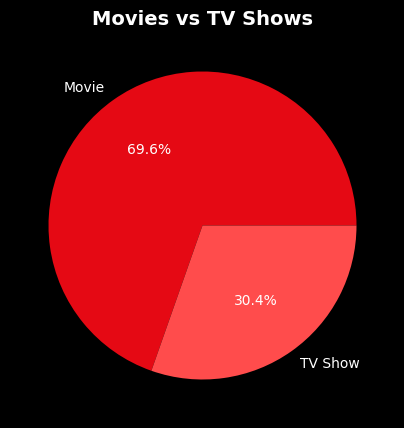

In [ ]:
# Pie Chart: Movies vs TV Shows
df['type'].value_counts().plot(
    kind='pie', autopct='%1.1f%%',
    colors=[NETFLIX_RED, NETFLIX_ORANGE],
    textprops={'color': TEXT_COLOR},
    figsize=(5,5)
)
plt.title("Movies vs TV Shows", color=TEXT_COLOR, fontsize=14, weight='bold')
plt.ylabel("")
plt.show()

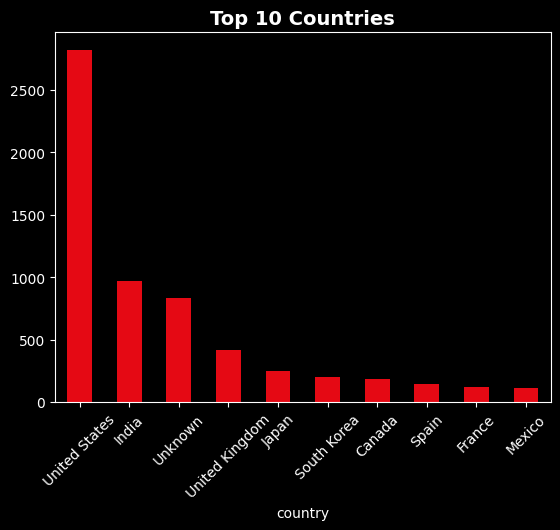

In [ ]:
# Bar Chart: Top 10 Countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color=NETFLIX_RED)
plt.title("Top 10 Countries", color=TEXT_COLOR, fontsize=14, weight='bold')
plt.xticks(rotation=45, color=TEXT_COLOR)
plt.yticks(color=TEXT_COLOR)
plt.show()

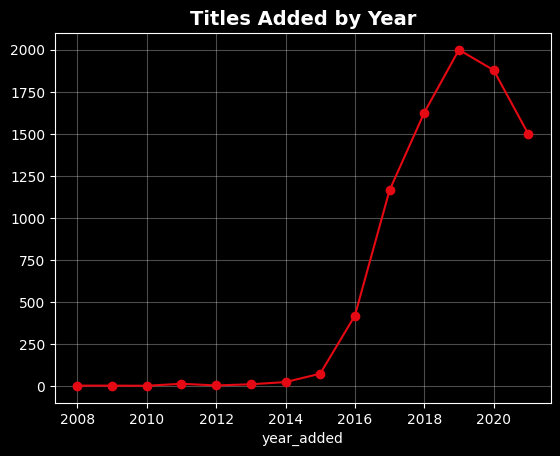

In [ ]:
# Line Chart: Titles Added by Year
df['year_added'] = df['date_added'].dt.year
titles_per_year = df.groupby('year_added').size()
titles_per_year.plot(kind='line', color=NETFLIX_RED, marker='o')
plt.title("Titles Added by Year", color=TEXT_COLOR, fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(color=TEXT_COLOR)
plt.yticks(color=TEXT_COLOR)
plt.show()

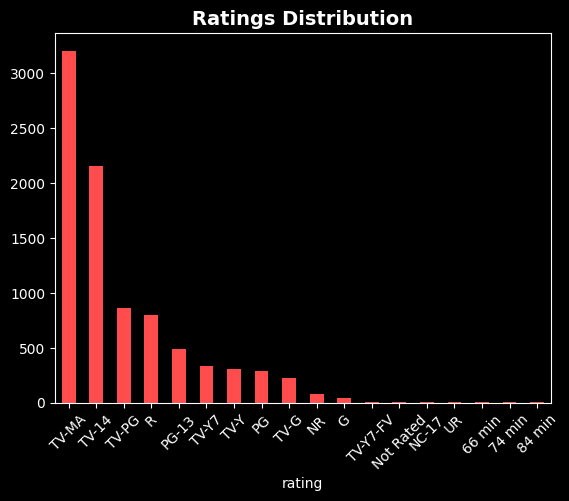

In [ ]:
df['rating'].value_counts().plot(kind='bar', color=NETFLIX_ORANGE)
plt.title("Ratings Distribution", color=TEXT_COLOR, fontsize=14, weight='bold')
plt.xticks(rotation=45, color=TEXT_COLOR)
plt.yticks(color=TEXT_COLOR)
plt.show()

In [ ]:
df.to_csv("netflix_cleaned.csv", index=False)